In [3]:
from zipfile import ZipFile
import os

# Path to the uploaded zip file
zip_path = 'data/ISOT Fake News Dataset.zip'

# Directory to extract the contents
extract_dir = 'data/ISOT_Fake_News_Dataset'

# Create a directory for extracted files
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the directory
extracted_files = os.listdir(extract_dir)
extracted_files



['ISOT Fake News Dataset']

In [5]:
# checking inside the newly found directory to see the contents
nested_dir = os.path.join(extract_dir, extracted_files[0])
nested_files = os.listdir(nested_dir)
nested_files


['test.csv', 'train.csv']

In [6]:
import pandas as pd

# Load the training data
train_data_path = os.path.join(nested_dir, 'train.csv')
train_data = pd.read_csv(train_data_path)

# Display the first few rows and the structure of the dataset
train_data.info(), train_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36532 entries, 0 to 36531
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text;label  36532 non-null  object
dtypes: object(1)
memory usage: 285.5+ KB


(None,
                                           text;label
 0  republican committee pass bill would prohibit ...
 1  trump treasury candidate bank accuse discrimin...
 2  guess behind sicken ad show boy bully dad vote...
 3  michigan treasurer call quick action detroit s...
 4  clinton urge renew fight value washington reut...)

In [7]:
# Load the training data with the correct delimiter
train_data = pd.read_csv(train_data_path, delimiter=';')

# Displaying the first few rows and the structure of the dataset 
train_data.info(), train_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36532 entries, 0 to 36531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36532 non-null  object
 1   label   36532 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 570.9+ KB


(None,
                                                 text  label
 0  republican committee pass bill would prohibit ...      0
 1  trump treasury candidate bank accuse discrimin...      1
 2  guess behind sicken ad show boy bully dad vote...      0
 3  michigan treasurer call quick action detroit s...      1
 4  clinton urge renew fight value washington reut...      1)

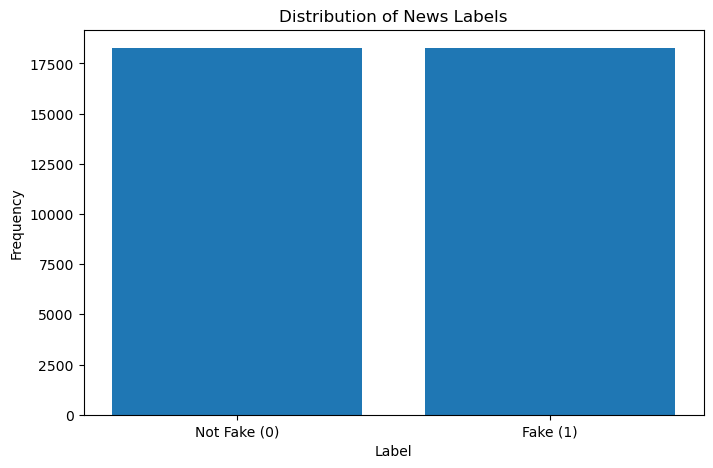

0    18266
1    18266
Name: label, dtype: int64

In [10]:
import matplotlib.pyplot as plt

# Plotting the distribution of labels in the dataset
label_counts = train_data['label'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, tick_label=['Not Fake (0)', 'Fake (1)'])
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

label_counts


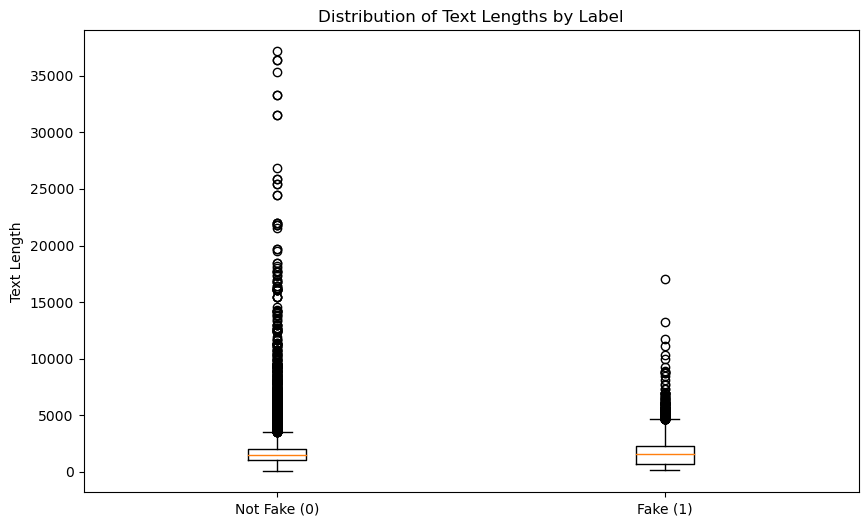

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,18266.0,1779.705080,1725.104767,43.0,1055.0,1484.0,2054.0,37168.0
1,18266.0,1683.601391,1137.916239,138.0,686.0,1566.0,2262.0,17041.0


In [11]:
# Calculate the length of each text
train_data['text_length'] = train_data['text'].apply(len)

# Displaying summary statistics and box plot of text lengths based on the label
summary_stats = train_data.groupby('label')['text_length'].describe()

# Plotting the text length distribution for each label
plt.figure(figsize=(10, 6))
plt.boxplot([train_data[train_data['label'] == 0]['text_length'], train_data[train_data['label'] == 1]['text_length']],
            labels=['Not Fake (0)', 'Fake (1)'])
plt.title('Distribution of Text Lengths by Label')
plt.ylabel('Text Length')
plt.show()

summary_stats


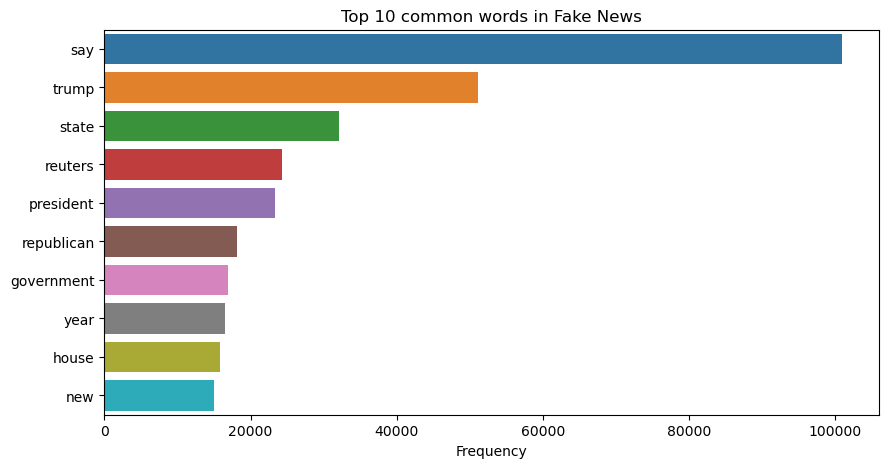

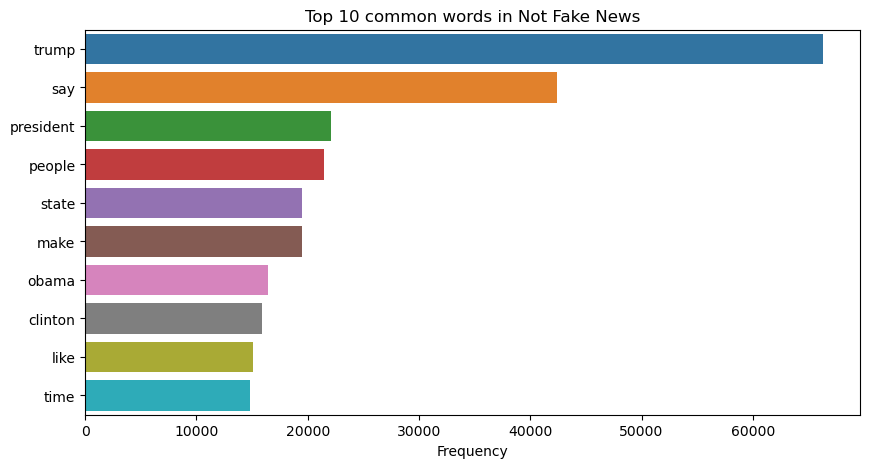

In [12]:

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Function to plot most common words
def plot_common_words(corpus, n_features, title):
    vectorizer = CountVectorizer(stop_words='english', max_features=n_features)
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Plot
    words, counts = zip(*words_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Frequency')

# Plotting the most common words in fake news
plot_common_words(train_data[train_data['label'] == 1]['text'], 10, 'Top 10 common words in Fake News')

# Plotting the most common words in not fake news
plot_common_words(train_data[train_data['label'] == 0]['text'], 10, 'Top 10 common words in Not Fake News')


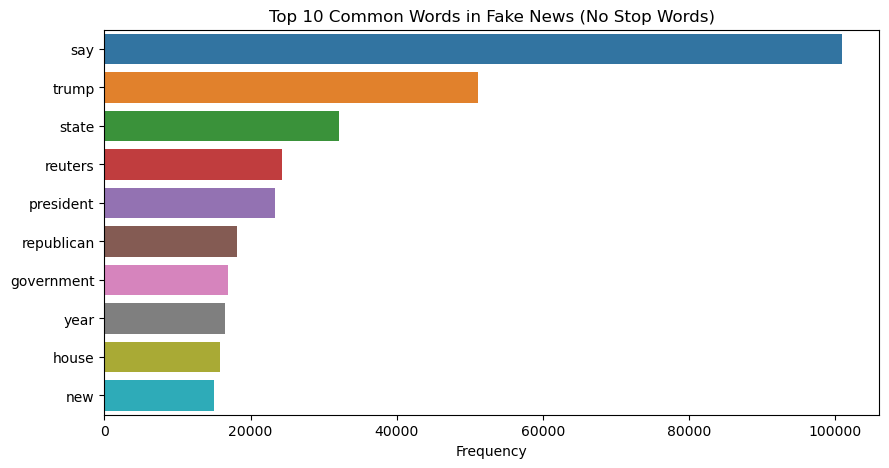

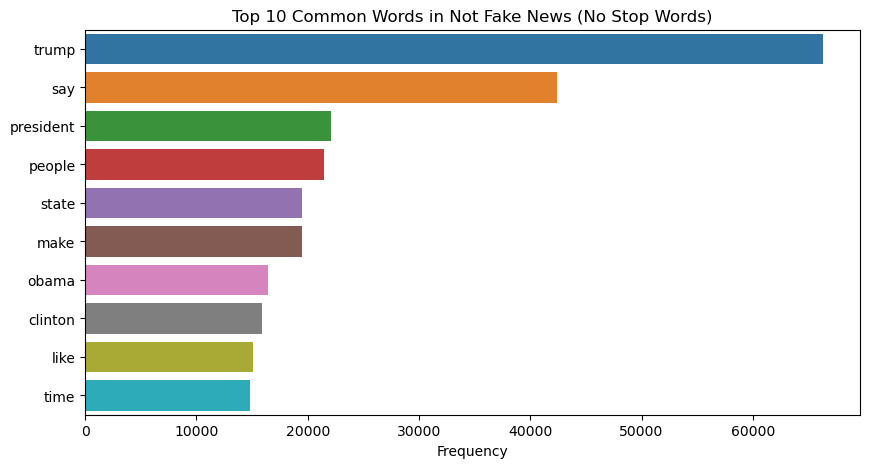

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Define a function to remove stop words
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to remove stop words from the texts
train_data['text_no_stopwords'] = train_data['text'].apply(remove_stop_words)

# Visualizing the top 10 common words in fake news without stop words
plot_common_words(train_data[train_data['label'] == 1]['text_no_stopwords'], 10, 'Top 10 Common Words in Fake News (No Stop Words)')

# Visualizing the top 10 common words in not fake news without stop words
plot_common_words(train_data[train_data['label'] == 0]['text_no_stopwords'], 10, 'Top 10 Common Words in Not Fake News (No Stop Words)')


In [15]:
from collections import Counter

# Function to count word frequencies in the corpus
def count_word_frequencies(text_series):
    word_counts = Counter()
    for text in text_series:
        words = text.split()
        word_counts.update(words)
    return word_counts

# Count word frequencies for fake and not fake news
fake_news_words = count_word_frequencies(train_data[train_data['label'] == 1]['text_no_stopwords'])
not_fake_news_words = count_word_frequencies(train_data[train_data['label'] == 0]['text_no_stopwords'])

# Displaying the most common 20 words in fake news
most_common_fake = fake_news_words.most_common(20)
most_common_not_fake = not_fake_news_words.most_common(20)

most_common_fake, most_common_not_fake


([('say', 100991),
  ('trump', 51192),
  ('u', 38822),
  ('state', 32043),
  ('would', 27202),
  ('reuters', 24363),
  ('president', 23383),
  ('republican', 18147),
  ('government', 16953),
  ('year', 16477),
  ('house', 15773),
  ('new', 15055),
  ('also', 13671),
  ('party', 13108),
  ('people', 13079),
  ('official', 12829),
  ('tell', 12436),
  ('make', 12393),
  ('election', 12294),
  ('country', 12053)],
 [('trump', 66342),
  ('say', 42448),
  ('president', 22109),
  ('people', 21476),
  ('go', 19832),
  ('one', 19719),
  ('state', 19473),
  ('make', 19446),
  ('would', 19169),
  ('u', 19106),
  ('get', 17182),
  ('obama', 16440),
  ('clinton', 15876),
  ('like', 15107),
  ('time', 14822),
  ('take', 14635),
  ('donald', 14464),
  ('video', 13218),
  ('know', 12940),
  ('hillary', 12756)])

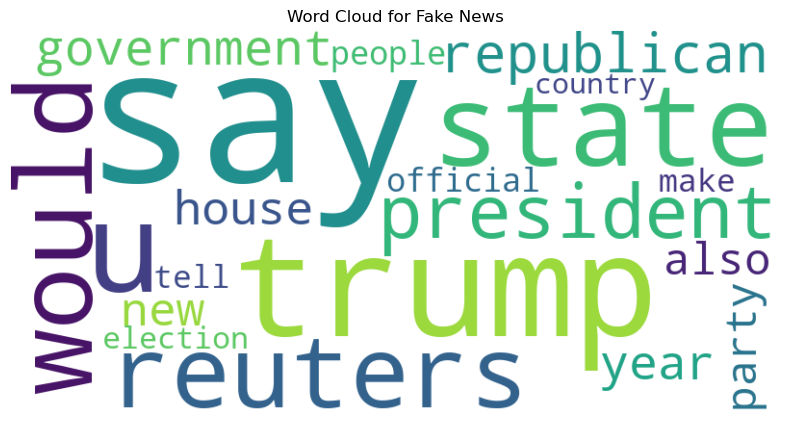

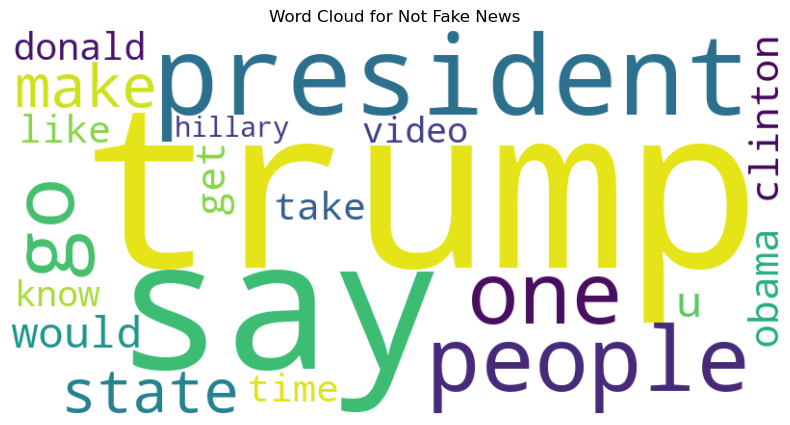

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_word_cloud(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Convert word frequency list to dictionary
fake_news_dict = dict(most_common_fake)
not_fake_news_dict = dict(most_common_not_fake)

# Generate word clouds
generate_word_cloud(fake_news_dict, 'Word Cloud for Fake News')
generate_word_cloud(not_fake_news_dict, 'Word Cloud for Not Fake News')


In [21]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
train_data['sentiment'] = train_data['text_no_stopwords'].apply(get_sentiment)

# Average sentiment for fake and not fake news
average_sentiment_fake = train_data[train_data['label'] == 1]['sentiment'].mean()
average_sentiment_not_fake = train_data[train_data['label'] == 0]['sentiment'].mean()

# Print the average sentiment scores
print("Average sentiment for fake news:", average_sentiment_fake)
print("Average sentiment for not fake news:", average_sentiment_not_fake)

Average sentiment for fake news: 0.04501543208108835
Average sentiment for not fake news: 0.04732467984377808


In [20]:
import textstat

# Function to calculate readability
def get_readability(text):
    return textstat.flesch_reading_ease(text)

# Apply readability analysis
train_data['readability'] = train_data['text_no_stopwords'].apply(get_readability)

# Average readability for fake and not fake news
average_readability_fake = train_data[train_data['label'] == 1]['readability'].mean()
average_readability_not_fake = train_data[train_data['label'] == 0]['readability'].mean()

# Print the average readability scores
print("Average readability for fake news:", average_readability_fake)
print("Average readability for not fake news:", average_readability_not_fake)

Average readability for fake news: -187.69836910106207
Average readability for not fake news: -198.01245483411805
